<a href="https://colab.research.google.com/github/Icraku/Customer-sentiment-analysis/blob/main/Data_collection_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
#imports

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

**Data collection By webscrapping**

In [79]:
#empty lists to collect reviews
reviews = []

#empty list to collect rating stars
stars = []

#empty list to collect date
date = []

#empty list to collect review's country
country = []

In [80]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
#pages = 10
page_size = 100

for i in range(1, 36):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    page = requests.get(url)

    # Parse content
    #content = page.content
    soup = BeautifulSoup(page.content, 'html5')

    for item in soup.find_all("div", class_='text_content'):
        reviews.append(item.text)

    for item in soup.find_all("div", class_="rating-10"):
        try:
          stars.append(item.span.text)
        except:
          print(f'Error on page {i}') 
          stars.append('None')

    #date
    for item in soup.find_all('time'):
        date.append(item.text)

    #country
    for item in soup.find_all('h3'):
        country.append(item.span.next_sibling.text.strip('()'))
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [81]:
# check if length of collected list is same
print(len(reviews))
print(len(country))
print(len(date))
print(len(stars))

3500
3500
3500
3535


The length should be the same, otherwise an error will occur when creating a dataframe. 

In [82]:
stars = stars[:3500]

# to make them same length.

**Creating a DataFrame to store the web scrapped data.**

In [83]:
df = pd.DataFrame({'reviews':reviews, 'stars':stars, 'date':date, 'country':country})
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | I booked our first out of c...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th June 2023,(United States)
1,✅ Trip Verified | My husband and I booked seat...,1,7th June 2023,(United Kingdom)
2,"Not Verified | May 3, flew from Seattle to He...",4,6th June 2023,(United States)
3,✅ Trip Verified | I went through three flights...,1,6th June 2023,(Greece)
4,✅ Trip Verified | An excellent flight in Club ...,2,6th June 2023,(United Kingdom)


**Quick Analysis to check number of rows and columns.**

In [84]:
df.shape

(3500, 4)

**Exporting the dataframe to csv format.**

In [85]:
import os
cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

Checking the first 5 rows of our data. It matches the website we scrapped it from.

In [86]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | I booked our first out of c...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th June 2023,(United States)
1,✅ Trip Verified | My husband and I booked seat...,1,7th June 2023,(United Kingdom)
2,"Not Verified | May 3, flew from Seattle to He...",4,6th June 2023,(United States)
3,✅ Trip Verified | I went through three flights...,1,6th June 2023,(Greece)
4,✅ Trip Verified | An excellent flight in Club ...,2,6th June 2023,(United Kingdom)


**Data cleaning**


*   Removing phrases that aren't useful in the analysis such as the tickmarks.
*   Cleaning the reviews.
*   Cleaning dates , country and stars.







In [87]:
#create column to see if trip is verified
df['verified'] = df.reviews.str.contains('Trip Verified')
df['verified']

0        True
1        True
2       False
3        True
4        True
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [88]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

*use nltk.download('all') to download all nltk modules.*

In [89]:
#cleaning reviews
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import os
lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip('✅ Trip Verified |')
reviews_data = reviews_data.str.strip('Not Verified |')

#create empty list to collect cleaned data corpus
corpus = []

#loop through each reviews, remove punctuation, make them lowercase, join them then add them to corpus
for rev in reviews_data:
    rev = re.sub('[a-zA-Z]', ' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)




In [90]:
reviews_data

0       I booked our first out of country trip to take...
1       My husband and I booked seats within our premi...
2       May 3, flew from Seattle to Heathrow then to E...
3       I went through three flights to reach my desti...
4       An excellent flight in Club World on British A...
                              ...                        
3495    BA 214 in the late spring os a 747-400. Lie-fl...
3496    MCT-LHR-MAN and LHR-MCT I think you need to fl...
3497    Boeing 777. One of our best flights from Europ...
3498    ampa-Gatwick. Check in lousy. I can't believe ...
3499    A long time user of BA I have seen a gradual d...
Name: reviews, Length: 3500, dtype: object

In [91]:
df['corpus'] = corpus

In [92]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | I booked our first out of c...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th June 2023,(United States),True,". 3 . . . 7 . , ( ). , , . . , 85 . …. . 30 , ..."
1,✅ Trip Verified | My husband and I booked seat...,1,7th June 2023,(United Kingdom),True,. 015 12 11 . . . / . .
2,"Not Verified | May 3, flew from Seattle to He...",4,6th June 2023,(United States),False,"3, . , , , . . . 24 . . . , , . . . . . ."
3,✅ Trip Verified | I went through three flights...,1,6th June 2023,(Greece),True,". , . ' ' 24 30 ' . , . ' . 2/10 ' ."
4,✅ Trip Verified | An excellent flight in Club ...,2,6th June 2023,(United Kingdom),True,". . , . . . / - 350. , . ’ ."


In [93]:
df['corpus']

0       . 3 . . . 7 . , ( ). , , . . , 85 . …. . 30 , ...
1                                 . 015 12 11 . . . / . .
2               3, . , , , . . . 24 . . . , , . . . . . .
3                    . , . ' ' 24 30 ' . , . ' . 2/10 ' .
4                            . . , . . . / - 350. , . ’ .
                              ...                        
3495                         214 747-400. - . - - . . . .
3496            - - - ' . - . - . 3 - ' . . - . . - - - .
3497                                   777. . . . . 747 .
3498    - . . ' . 3 32.7 .7 (1 ) . . . ' ' . ' ' . . $...
3499                            - - 747. . 10 . 1 ' ' . .
Name: corpus, Length: 3500, dtype: object

In [94]:
#cleaning date
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [95]:
#convert date to datatime format
df.date = pd.to_datetime(df.date)

In [96]:
df.date.head()

0   2023-06-08
1   2023-06-07
2   2023-06-06
3   2023-06-06
4   2023-06-06
Name: date, dtype: datetime64[ns]

In [97]:
df.reviews.head(10)

0    ✅ Trip Verified |  I booked our first out of c...
1    ✅ Trip Verified | My husband and I booked seat...
2    Not Verified |  May 3, flew from Seattle to He...
3    ✅ Trip Verified | I went through three flights...
4    ✅ Trip Verified | An excellent flight in Club ...
5    ✅ Trip Verified | The flight schedule was dela...
6    ✅ Trip Verified | The worst experience in all ...
7    ✅ Trip Verified |  The worst experience in all...
8    ✅ Trip Verified |  Terrible delays. Had to reb...
9    ✅ Trip Verified |  A serious medical problem a...
Name: reviews, dtype: object

In [98]:
df.country.head(10)

0      (United States) 
1     (United Kingdom) 
2      (United States) 
3             (Greece) 
4     (United Kingdom) 
5             (Canada) 
6      (United States) 
7          (Australia) 
8      (United States) 
9             (Cyprus) 
Name: country, dtype: object

In [109]:
#removing the parenthesis from the country column
df['country'] = df['country'].str.replace(r'[()]',"")

<ipython-input-109-6ce6615d0ffc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['country'] = df['country'].str.replace(r'[()]',"")


In [111]:
df['country']

0         United States 
1        United Kingdom 
2         United States 
3                Greece 
4        United Kingdom 
              ...       
3495      United States 
3496               Oman 
3497      United States 
3498     United Kingdom 
3499     United Kingdom 
Name: country, Length: 3500, dtype: object

**Exploring the data:**
*   **Average overall rating given to the airline**
*   **Total counts for each ratings**
*   **Wich country provided on average highest ratings?**
*   **From which country did most reviews come from?**



In [123]:
df.stars.head(10)

0    5.0
1    1.0
2    4.0
3    1.0
4    2.0
5    9.0
6    3.0
7    1.0
8    1.0
9    2.0
Name: stars, dtype: float64

In [135]:
df.stars.value_counts()

1.0     785
2.0     396
3.0     390
8.0     349
10.0    307
7.0     298
9.0     295
5.0     258
4.0     239
6.0     178
0.0       5
Name: stars, dtype: int64

Most reviews are rated 1 but that is not yet a conclusive understanding of what BA customers experience.

In [124]:
#cleaning ratings with stars
df.stars.unique()

array([ 5.,  1.,  4.,  2.,  9.,  3., 10.,  7.,  8.,  6.,  0.])

In [112]:
# AVERAGE OVERALL RATINGS
# remove non-numeric values from the star column
df["stars"] = pd.to_numeric(df["stars"], errors='coerce')

# replace missing values with a default value
df["stars"].fillna(0, inplace=True)

# convert the column to a float data type
df["stars"] = df["stars"].astype(float)
print(df["stars"].mean())

4.761142857142858


Text(0.5, 1.0, 'Counts for each ratings')

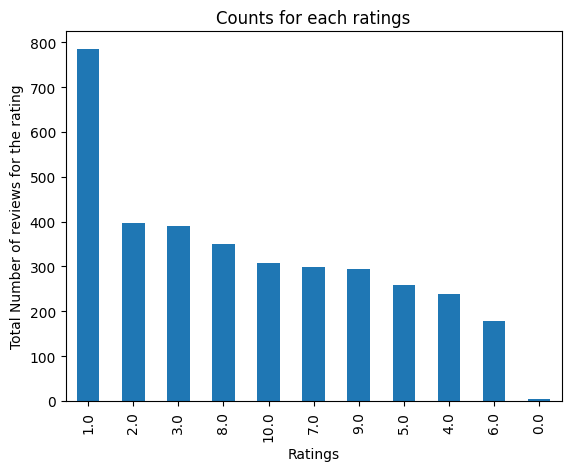

In [113]:
#TOTAL COUNTS FOR EACH RATINGS

df.stars.value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Total Number of reviews for the rating')
plt.title('Counts for each ratings')

In [114]:
#percentage of ratings
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values / df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [115]:
# reseting the index 
# renaming the columns for the dataframe to get total counts and percentage ratings

In [116]:
df_ratings = df_ratings.reset_index()
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)
df_ratings

,Stars,total_counts,pct_values
0,1.0,785,22.43
1,2.0,396,11.31
2,3.0,390,11.14
3,8.0,349,9.97
4,10.0,307,8.77
5,7.0,298,8.51
6,9.0,295,8.43
7,5.0,258,7.37
8,4.0,239,6.83
9,6.0,178,5.09


In [117]:
max(df_ratings.total_counts)

785

Text(0.5, 1.0, 'Counts for each ratings')

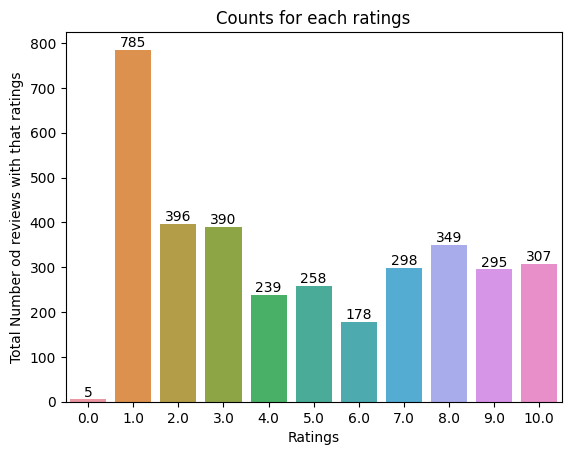

In [118]:
# Visualizing ratings and total counts
clrs = ['Red' if (x == max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings)

ax.bar_label(ax.containers[0])

ax.set_xlabel('Ratings')
ax.set_ylabel('Total Number od reviews with that ratings')
ax.set_title('Counts for each ratings')

In [119]:
# Unique countries that sent reviews
print(f'{len(df.country.unique())} unique countries')

71 unique countries


**BA has customers fro 71 countries according to the reviews received!**

Text(0.5, 1.0, 'Maximum number of reviews by the top 5 countries')

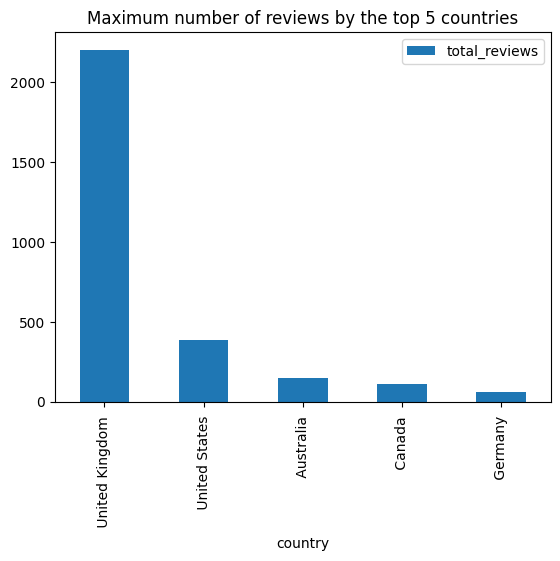

In [120]:
# COUNTRY THAT SENT MOST REVIEWS
df_country_reviews = pd.DataFrame(df.country.value_counts().head()).reset_index()
df_country_reviews.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

df_country_reviews.plot(kind='bar', x='country')
plt.title('Maximum number of reviews by the top 5 countries')

In [126]:
# COUNTRY THAT PROVIDED AVERAGELY THE HIGHEST RATINGS
df_country_ratings = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
df_country_ratings.rename(columns={'stars':'avg_ratings'}, inplace=True)

<ipython-input-126-42ab0e4d0277>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_country_ratings = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

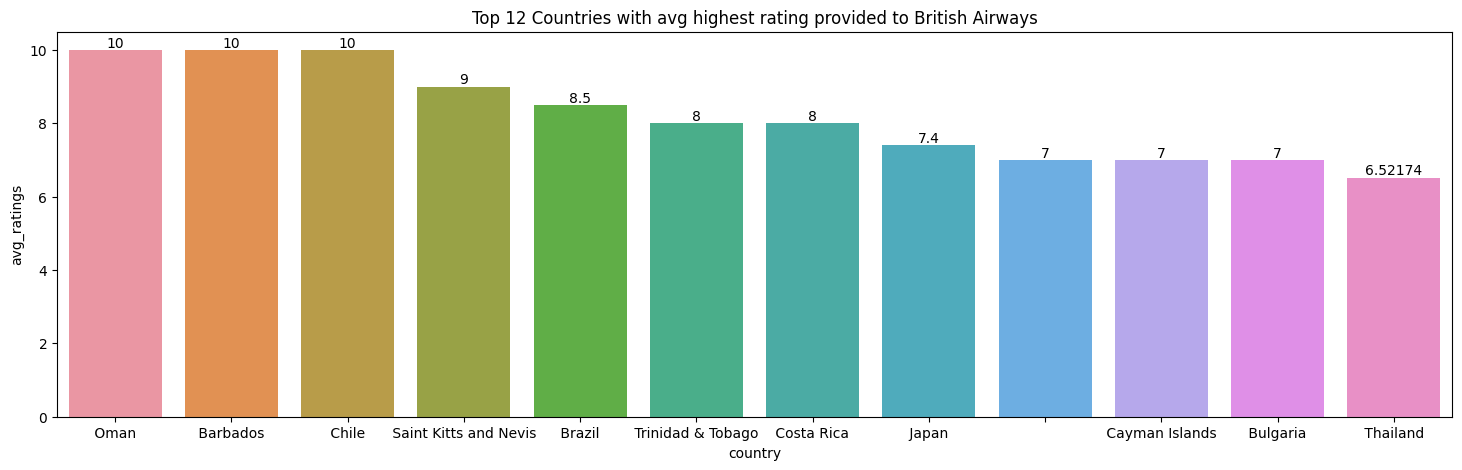

In [128]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_ratings', data=df_country_ratings[:12])
ax.bar_label(ax.containers[0])
ax.set_title('Top 12 Countries with avg highest rating provided to British Airways')

**Time Series Analysis**

In [132]:
import plotly.express as px
df.date = pd.to_datetime(df.date)

fig = px.line(df, x='date', y='stars')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to around September 2021 there has been a decline in reviews which can be attributed to Covid Pandemic travel restrictions. Other than that there is no other significant trend visible from the plot.

In [122]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | I booked our first out of c...,5.0,2023-06-08,United States,True,". 3 . . . 7 . , ( ). , , . . , 85 . …. . 30 , ..."
1,✅ Trip Verified | My husband and I booked seat...,1.0,2023-06-07,United Kingdom,True,. 015 12 11 . . . / . .
2,"Not Verified | May 3, flew from Seattle to He...",4.0,2023-06-06,United States,False,"3, . , , , . . . 24 . . . , , . . . . . ."
3,✅ Trip Verified | I went through three flights...,1.0,2023-06-06,Greece,True,". , . ' ' 24 30 ' . , . ' . 2/10 ' ."
4,✅ Trip Verified | An excellent flight in Club ...,2.0,2023-06-06,United Kingdom,True,". . , . . . / - 350. , . ’ ."


In [137]:
#check for null values
df.isnull().sum()

reviews     0
stars       0
date        0
country     0
verified    0
corpus      0
dtype: int64

**Visualizing the words used in the reviews using WordCloud.**

In [138]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [139]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

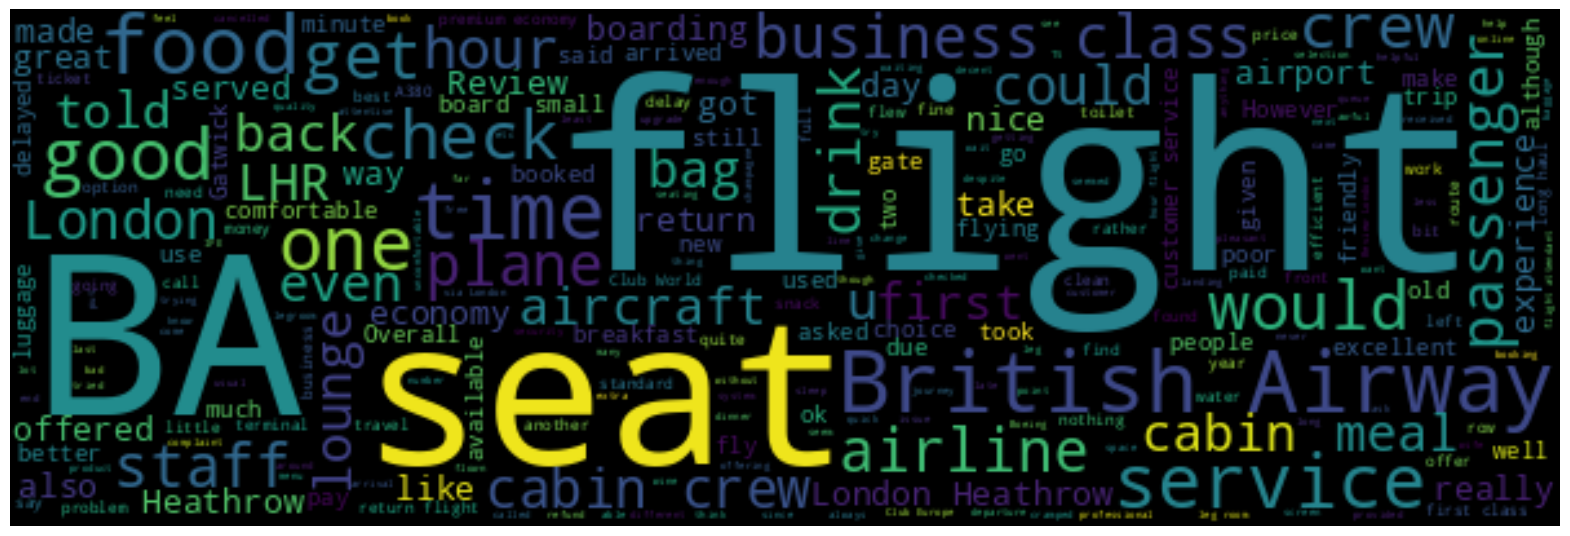

In [141]:
df['reviews_data'] = reviews_data

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

reviews = ''.join(df.reviews_data)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

#create and generate word cloud image
wordcloud = WordCloud(width=600, height=200, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

#display it
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Words like 'flight', 'passenger' etc don't add any conclusive value so we'll include them in stopwords.

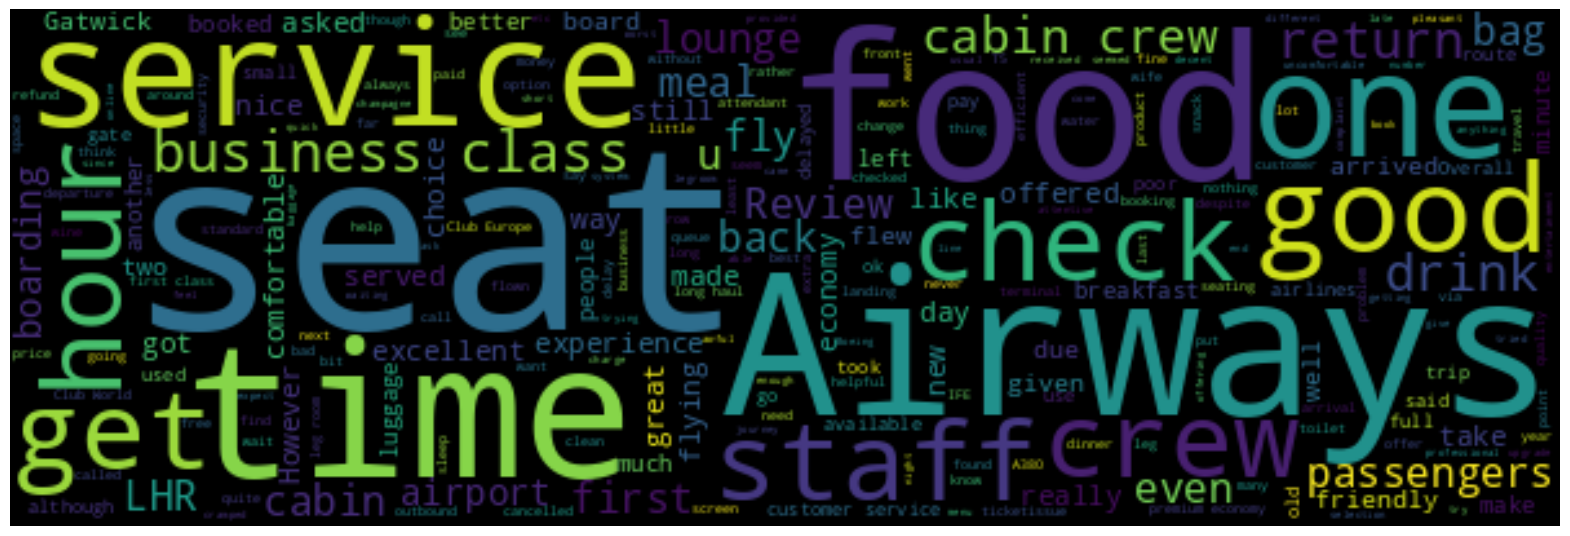

In [142]:
from wordcloud import WordCloud, STOPWORDS
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

reviews = ''.join(df.reviews_data)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(['ba','flight','flights','british','airway','airline','plane','told','also','passenger','london','aircraft','could','event','would','heathrow'])

#create and generate word cloud image
wordcloud = WordCloud(width=600, height=200, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

#display it
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Checking the Word Frequency**

In [143]:
#word frequency
from nltk import ngrams
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split text of all services to list of words
words = reviews.split(' ')

#remove words that will be used to determine positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight','flight.','flights','fly','ba','passenger','u','','like','check','hour','hours','told','london','London.','London','airway','Airway','Airways','Airline','Airline.','airline','british','heathrow','Heathrow','plane','lhr','review','I','-','We','The','This','It','BA','British','just','did','They','got'])

new_words = [word for word in words if word not in stopwords]

nlp_words = FreqDist(new_words).most_common(20)

#create df of these words and their frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'service'),
  Text(1, 0, 'seat'),
  Text(2, 0, 'crew'),
  Text(3, 0, 'food'),
  Text(4, 0, 'seats'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'time'),
  Text(8, 0, 'staff'),
  Text(9, 0, 'class'),
  Text(10, 0, 'business'),
  Text(11, 0, 'economy'),
  Text(12, 0, '|'),
  Text(13, 0, 'Club'),
  Text(14, 0, 'return'),
  Text(15, 0, 'passengers'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'new'),
  Text(18, 0, 'long'),
  Text(19, 0, 'meal')])

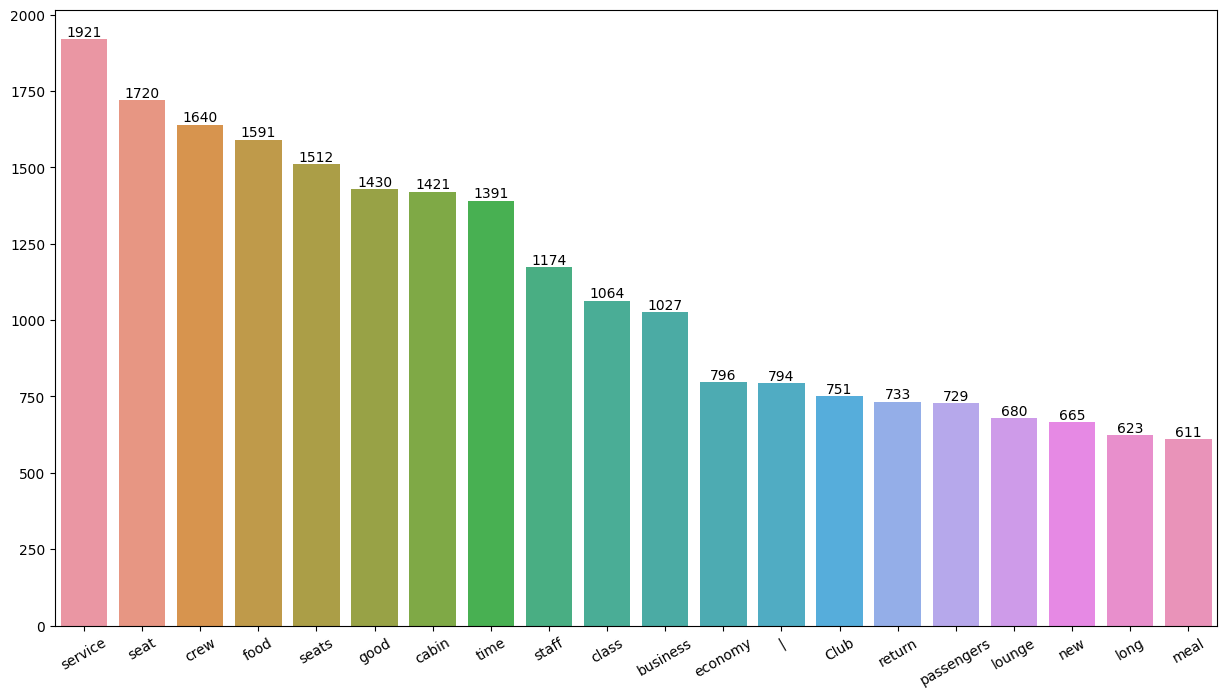

In [144]:
# setting figure into variables
fig, ax = plt.subplots(figsize=(15,8))
#seaborn plotting
import seaborn as sns
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about.The services are mostly talked about followed by 'seat' and 'crew'which are all important to any customer. However, we still don't know what they're expressing about the services. Therefore, to bring some significance to these, we will use other plots to see if they are positive or negative experiences with respect to most frequent words.

In [163]:
#loop through each reviews, remove punctuation, make them lowercase, join them then add them to corpus
import string
for punctuation in string.punctuation:
    reviews_data = reviews_data.replace(punctuation, '')
reviews_data

0        booked  first   country trip  take  husband  ...
1        husband   booked seats within  premium econom...
2        , flew from Seattle  Heathrow then  Edinburgh...
3        went through three flights  reach  destinatio...
4        excellent flight  Club World  British Airways...
                              ...                        
3495        late spring   -. -flat seats were   still ...
3496    --  -  think  need    every  often  remind you...
3497    Boeing .    best flights from Europe. Everythi...
3498    ampa-Gatwick. Check  lousy.  ' believe   writi...
3499     long time user    have seen  gradual decline ...
Name: reviews, Length: 3500, dtype: object

In [169]:
"""
# imports
import nltk.collocations as collocatiobs
from nltk import FreqDist, bigrams

reviews = " ".join(reviews_data)

# Split the text of all reviews to a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams):
    from nltk import ngrams

    # Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    # Create FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    # Sort values by frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Join bigram tokens with '_' while maintaining sorting
    ngram_joined = {'_'.join(k) for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    # Convert to Pandas Series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind='barh')

    return ax

get_freq_dist(new_words, 4)
"""

'\n# imports\nimport nltk.collocations as collocatiobs\nfrom nltk import FreqDist, bigrams\n\nreviews = " ".join(reviews_data)\n\n# Split the text of all reviews to a list of words\nwords = reviews.split(" ")\n\nnew_words = [word for word in words if word not in stopwords]\n\ndef get_freq_dist(new_words,number_of_ngrams):\n    from nltk import ngrams\n\n    # Generate bigrams\n    ngrams = ngrams(new_words, number_of_ngrams)\n\n    # Create FreqDist\n    ngram_fd = FreqDist(ngrams).most_common(40)\n\n    # Sort values by frequency\n    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}\n\n    # Join bigram tokens with \'_\' while maintaining sorting\n    ngram_joined = {\'_\'.join(k) for k,v in sorted(ngram_fd, key=lambda item:item[1])}\n\n    # Convert to Pandas Series for easy plotting\n    ngram_freqdist = pd.Series(ngram_joined)\n    plt.figure(figsize=(10,10))\n    ax = ngram_freqdist.plot(kind=\'barh\')\n\n    return ax\n\nget_freq_dist(new_words, 4)\n'